Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$


# Exercício 4: Regressão Logística

Neste exercício você irá implementar um classificador por regressão logística e aplicá-lo em diversos conjuntos de dados.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')

def plot_boundary(decision_function, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = decision_function(X).reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
```

# Conjunto de dados #1

O primeiro conjunto de dados que usaremos, disponibilizado no arquivo `grades.csv`, fornece a pontuação de alunos em dois exames e a decisão se o aluno é aceito em uma universidade. Particione o conjunto de dados em treinamento e teste através do comando:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=0)
```

e trace o gráfico do **conjunto de treinamento** usando a função `plot_data` fornecida.

O seu objetivo é treinar um classificador linear por regressão logística que prevê a decisão de aceitação em função das notas nos dois exames.

## Implementação do classificador

- Organize suas funções em uma classe do Python, conforme dada abaixo. Note que a função `fit` já está completa, bastando implementar as demais.

- Para efetuar a otimização, usaremos o otimizador do SciPy (função `minimize`), o que, além de implementar métodos mais eficientes que o método do gradiente, possui a vantagem de não precisarmos escolher a taxa de aprendizagem. Além disso, o método padrão (BFGS, para otimização sem restrição) é robusto à escala dos atributos, não sendo necessário realizar normalização de atributos.

- A função `minimize` requer a função objetivo da otimização (`fun`), um ponto inicial (`x0`) e, opcionalmente, uma função que calcula o gradiente (`jac`). A configuração `jac=True` indica que o gradient será passado como segundo elemento de saída da função `fun`. Isto é especialmente conveniente quando o cálculo do custo e do gradiente compartilham algumas operações. Quaisquer argumentos subsequentes para `fun` (e `jac`) devem ser passados como `args`. Assim, para completar a implementação do treinamento, basta implementar a função `fobj` retornando custo e gradiente. Note que esta função tem como entrada uma variável `w`, i.e., o ponto que será testado pelo otimizador a cada iteração. O vetor de pesos do modelo só é criado após o treinamento e armazenado em `self.w`.

- O otimizador do SciPy trabalha apenas com arrays 1-D. Assim, certifique-se que suas funções aceitam que `w` seja um array 1-D.

- A função `decision_function` retorna o discriminante que é comparado com zero para realizar a classificação. A função sigmóide logística é utilizada somente no treinamento.

- Para evitar problemas numéricos na implementação da sigmóide, você pode usar `np.clip` ou `np.tanh`.
- Para garantir a consistência com a notação utilizada em sala, use `y_hat` para denotar a predição não-quantizada ($\hat{y} = \sigma(z) \in [0,1] \subseteq \RR$) e `y_pred` para denotar a predição do rótulo da classe ($y_{pred} \in \{0,1\}$).

```python
def sigmoid(z):
    return s

class Model():
    ''' Logistic regression model '''
    def add_ones(self, X):
        ''' Add column of ones '''
        return X_new
    def fobj(self, w, X, y):
        ''' Compute cost and gradient for optimization '''
        return J, grad
    def fit(self, X, y):
        ''' Fit the model according to the given training data '''
        X = self.add_ones(X)
        self.w = minimize(fun=self.fobj, x0=np.zeros(X.shape[1]), jac=True, args=(X,y)).x
        return
    def decision_function(self, X):
        ''' Predict confidence score (discriminant) z = f(x) = w^T x'''
        return z
    def predict(self, X):
        ''' Predict class label (0 or 1) '''
        return y_pred
    def accuracy(self, X, y):
        ''' Return the mean accuracy '''
        return acc
```

## Treinamento

Treine o classificador e trace um gráfico mostrando o conjunto de treinamento e as regiões de decisão do classificador. Para isto, utilize a função `plot_boundary` fornecida:

```python
plot_boundary(model.decision_function,X_train)
```

onde `model` corresponde ao modelo treinado.

Reporte também a acurácia (= # de classificações certas / tamanho do conjunto) em ambos os conjuntos.

## Adição de atributos

Adicione mais atributos e repita o item anterior até obter 100% de acerto no conjunto de treinamento. Para isso introduza uma função `add_features` e utilize-a nos locais apropriados, como no Exercício 3.

Enquanto estiver adicionando atributos, **não avalie o desempenho no conjunto de teste**, somente quando tiver finalizado a definição do modelo. É útil interpretar o conjunto de teste como um recurso finito, que deve ser usado apenas esporadicamente, para evitar overfitting.

O que você pode concluir dos resultados obtidos?

# Conjuntos de dados #2

O próximo conjunto de dados que usaremos é sintético, gerado pelos comandos abaixo.

```python
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1200, noise=0.28, factor=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
plot_data(X_train,y_train)
```

Note que estamos utilizando um conjunto de teste com 1000 amostras, muito maior do que o conjunto de treinamento, com 200 amostras. A motivação é proporcionar uma medida confiável de desempenho através do conjunto de teste e ao mesmo tempo ilustrar a ocorrência de overfitting em um conjunto de treinamento pequeno.

## Treinamento

Inicialmente, treine o classificador **sem adição de atributos** e meça a acurácia no conjunto de treinamento. Assim como antes, evite medir a acurácia no conjunto de teste. Nessa etapa, o objetivo é simplesmente obter uma boa representação do conjunto de treinamento.

O que você observa? Explique.

## Adição de atributos

Repita o item anterior adicionando atributos polinomiais, incluindo termos cruzados, até obter 100% de acerto no conjunto de treinamento. Em particular, a função `add_features` deve introduzir automaticamente todos os termos polinomiais com grau até $d$, i.e.,

$$
x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, x_1^2 x_2, x_1 x_2^2, x_2^3, \ldots
$$

onde $d$ é um parâmetro especificado na inicialização do modelo. Para isso, adicione a função

```python
def __init__(self, d=1):
    ''' Initialization '''
    self.d = d
    return
```

à classe do modelo e o instancie com `model = Model(d)`.

Analise as regiões de decisão obtidas à medida que o grau `d` aumenta e explique o que você observa. Ao final (i.e., ao obter o menor grau que proporciona 100% de acurácia de treinamento), meça a acurácia de teste. O que ocorre? Explique.

## Regularização

Introduza regularização L2 no treinamento, com parâmetro de regularização `lamb` ($\lambda$). Para isso, altere as funções `fobj` e `fit` adicionando um argumento `lamb=0` (ou, se preferir, defina `lamb` na inicialização do modelo).

Mantendo o mesmo grau $d$ obtido no item anterior, ajuste o parâmetro de regularização e verifique qualitativamente a variação das regiões de decisão, bem como da acurácia de treinamento. Após encontrar um valor de $\lambda$ que pareça razoável, meça a acurácia de teste. Discuta o que você observou.

# Conjuntos de dados #3

O próximo conjunto de dados é gerado pelos comandos abaixo.

```python
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1200, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
plot_data(X_train,y_train)
```

Repita todas as etapas da seção anterior (conjunto #2) para este novo conjunto de dados.

# (OPCIONAL) Busca por hiperparâmetros

Para os conjuntos #2 e #3, realize uma busca melhor melhor valor de $\lambda$, utilizando como métrica a acurácia no conjunto de teste. Se desejar, realize também a busca conjunta pelo melhor valor de $d$.

Note que os parâmetros $d$ e $\lambda$ são definidos pelo desenvolvedor do modelo e não são alterados durante o treinamento, i.e., não podem ser aprendidos a partir dos dados. Por esse motivo, são chamados de **hiperparâmetros**, para distingui-los dos parâmetros sujeitos a treinamento.

**Obs:** em geral, deve-se evitar fazer a busca de hiperparâmetros no conjunto de teste, pois podemos estar causando overfitting nesse conjunto, e a medida de desempenho resultante não seria mais confiável. É recomendável usar o conjunto de teste somente na avaliação final do modelo. Para isto, podemos separar parte do conjunto de treinamento para utilizar como **conjunto de validação**, usando para treinamento somente as amostras restantes. Este método de validação é conhecido como **hold-out**. Existem também outros métodos mais sofisticados de validação cruzada que realizam múltiplas seleções distintas do conjunto de validação e calculam a média do desempenho obtido, o que é útil quando o conjunto de treinamento é pequeno.

<!-->Neste exercício, o efeito de overfitting na busca por hiperparâmetros tende a ser pequeno, uma vez que o conjunto de teste é grande em relação à dimensionalidade do problema. Mas, caso deseje realizar a busca de hiperparâmetros sobre um conjunto de validação, sem alterar o conjunto de treinamento, você pode separar 50% das amostras do conjunto de teste.<-->

# Conjunto de dados #4

O último conjunto de dados que usaremos pode ser encontrado aqui:

https://www.kaggle.com/uciml/iris/data

O objetivo é implementar um classificador para classificar entre três tipos de plantas, i.e., trata-se de um problema de classificação multi-classe. O conjunto de dados é pequeno (relativamente à dimensão do problema) e o objetivo do exercício é apenas ilustrar a classificação multi-classe. Assim, utilize todo o conjunto de dados como conjunto de treinamento.

Implemente apenas regressão logística sem regularização com os atributos originais, e reporte a taxa de acerto.

**Dica:** a classificação multi-classe pode ser implementada utilizando-se $K$ classificadores binários distintos, cada um treinado sobre um conjunto de dados com variável de saída $y_k$, correspondente ao $k$-ésimo elemento do vetor resultante da codificação one-hot do rótulo da classe, $y = (y_1,\ldots,y_K)$. Nesse caso, escolhe-se como predição a classe que possui maior valor de discriminante, obtido pela função `decision_function`.

---

# Resolução do exercício 4

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Plot functions

In [2]:
def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')

def plot_boundary(decision_function, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = decision_function(X).reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])

## Conjunto de dados #1

In [3]:
df = pd.read_csv('data/grades.csv')

df.head()

,Exam 1,Exam 2,Admitted
0,6.9,8.0,1
1,5.0,6.6,1
2,9.3,9.3,1
3,3.9,4.5,0
4,3.4,6.1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
Exam 1      300 non-null float64
Exam 2      300 non-null float64
Admitted    300 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB


In [5]:
df.describe()

,Exam 1,Exam 2,Admitted
count,300.000000,300.000000,300.000000
mean,6.507000,6.416000,0.576667
std,2.021337,1.959134,0.494913
min,3.000000,3.000000,0.000000
25%,4.875000,4.700000,0.000000
50%,6.500000,6.400000,1.000000
75%,8.125000,8.100000,1.000000
max,10.000000,10.000000,1.000000


In [6]:
X = df[['Exam 1', 'Exam 2']].values

y = df['Admitted'].values

X.shape, y.shape

((300, 2), (300,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=0)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 2), (200,), (100, 2), (100,))

Gráfico do conjunto de treinamento

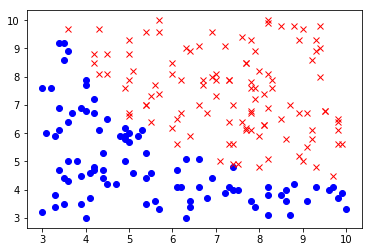

In [9]:
plot_data(X_train,y_train)

### Implementação do classificador

In [10]:
def sigmoid(z):
#     s = np.exp(-np.logaddexp(0, -z)) # 1 / (1 + np.exp(-z)) 
    s = expit(z)
#     s = .5 * (np.tanh(.5 * z) + 1)
    return s

class Model():
    ''' Logistic regression model '''
    def __init__(self, d=1,lamb=0,cross_terms=False):
        ''' Initialization '''
        self.d = d
        self.cross_terms = cross_terms
        self.lamb = lamb
        return

    def add_ones(self, X):
        ''' Add column of ones '''
        X_new = np.hstack((np.ones_like(X[:,0].reshape(-1,1)), X))
        return X_new
    
    def fobj(self, w, X, y):
        ''' Compute cost and gradient for optimization '''
        m = y.shape[0]
        y_hat = sigmoid(X @ w)
        # Cost function
        J = (-1/m)*(y.T @ np.log(y_hat) + (1-y).T @ np.log(1 - y_hat))   
        # Grad function
        grad = (1/m)*(X.T @ (sigmoid(X @ w) - y))
        return J, grad
    
    def fit(self, X, y):
        ''' Fit the model according to the given training data '''
        X = self.add_ones(X)
        self.w = minimize(fun=self.fobj, x0=np.zeros(X.shape[1]), jac=True, args=(X,y)).x
        return
    
    def decision_function(self, X):
        ''' Predict confidence score (discriminant) z = f(x) = w^T x'''
        X = self.add_ones(X)
        z = X @ self.w
        return z
    
    def predict(self, X):
        ''' Predict class label (0 or 1) '''
        y_pred = self.decision_function(X)>0
        return y_pred
    
    def accuracy(self, X, y):
        ''' Return the mean accuracy '''
        y_pred = self.predict(X)
        correct = list((y_pred == y)).count(True)
        acc = correct/len(y)
        return acc

### Treinamento

w:  [-25.73110236   1.74545624   2.40749431]
Accuracy:  89.0 %
Train accuracy:  90.0 %
Test accuracy:  87.0 %


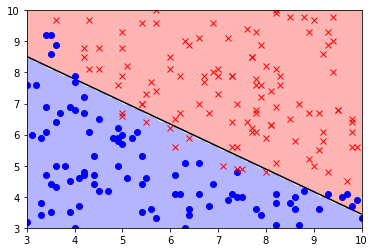

In [11]:
model = Model()
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

### Adição de atributos

In [12]:
def add_features(self,X):
    x1 = X[:,0].reshape(-1,1)
    x2 = X[:,1].reshape(-1,1)
    X_new = np.hstack((X,X**2))
    return X_new

def fit(self, X, y):
    ''' Fit the model according to the given training data '''
    X = self.add_features(X)
    X = self.add_ones(X)
    self.w = minimize(fun=self.fobj, x0=np.zeros(X.shape[1]), jac=True, args=(X,y)).x
    return

def decision_function(self, X):
    ''' Predict confidence score (discriminant) z = f(x) = w^T x'''
    X = self.add_features(X)
    X = self.add_ones(X)
    z = X @ self.w
    return z

Model.add_features = add_features
Model.fit = fit
Model.decision_function = decision_function

In [13]:
test = Model()
test = test.add_features(X_train)
print("train[0]: ", X_train[0])
print("test[0]: ", test[0])
test[0].shape

train[0]:  [9.8 3.7]
test[0]:  [ 9.8   3.7  96.04 13.69]


(4,)

### Erro de implementação

Não foi possível conseguir 100% de acurácia de forma alguma. Mesmo usando as features mostradas em sala.

Tentei debugar o problema, mas não consegui. Possívelmente está nas funções que criei e talvez tenha a ver com o erro RuntimeWarning que estou obtendo.

w:  [-163.27202393   23.05095196   16.37487461   -1.2876637    -0.64082315]
Accuracy:  99.0 %
Train accuracy:  98.5 %
Test accuracy:  100.0 %


c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


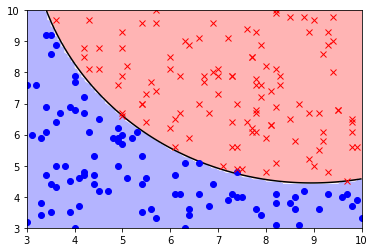

In [14]:
model = Model()
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X)

## Conjunto de dados #2

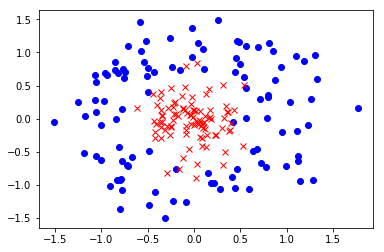

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1200, noise=0.28, factor=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
plot_data(X_train,y_train)

### Treinamento sem adição de atributos

In [16]:
#     def add_features(self,X):
#         ''' Add new features derived from the original ones '''
# #         X_new = np.hstack((X,X**2,X**3))
#         x1 = X[:,0].reshape(-1,1)
#         x2 = X[:,1].reshape(-1,1)
#         for i in range(2,self.d+1):
#             x1_new = np.power(x1,i)
#             x2_new = np.power(x2,i)
#             if self.cross_terms:
#                 x1x2 = x1*x2
#                 X_new = np.hstack((X,x1_new,x1x2,x2_new))
#             else:
#                 X_new = np.hstack((X,x1_new,x2_new))
#             X = X_new
#         X_new = X
#         return X_new

def add_features(self,X):
    X_new = X.copy()
    x1 = X[:,0]
    x2 = X[:,1]
    for i in range(2, self.d+1):
        for j in range(self.d+1):
            X_new = np.c_[X_new, (x1**(i-j)) * (x2**(j))]
    return X_new

Model.add_features = add_features

### Erro de implementação

A função add_features está adicionando 1 elemento extra (-1.23878334e+00) que não consigo ver de onde aparece.

E está causando problema no treinamento dos conjuntos de dados

In [17]:
test = Model(3)
test = test.add_features(X_train)
print("train[0]: ", X_train[0])
print("test: ", test[0])
test[0].shape

train[0]:  [-0.09137313  0.48373178]
test:  [-9.13731286e-02  4.83731776e-01  8.34904863e-03 -4.42000858e-02
  2.33996431e-01 -1.23878334e+00 -7.62878693e-04  4.03870012e-03
 -2.13809860e-02  1.13191509e-01]


(10,)

w:  [-0.07086982 -0.02539151 -0.28690359]
Accuracy:  39.58333333333333 %
Train accuracy:  41.0 %
Test accuracy:  39.300000000000004 %


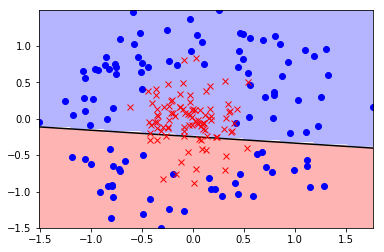

In [18]:
model = Model()
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

### Adição de atributos 

w:  [  6.85767886  -2.86153842  -0.54617288 -19.30139386   1.9449857
 -10.07247294  -0.02261994   3.11835665  -0.7727739    7.32688664
  -0.25468313]
Accuracy:  91.66666666666666 %
Train accuracy:  93.5 %
Test accuracy:  91.3 %


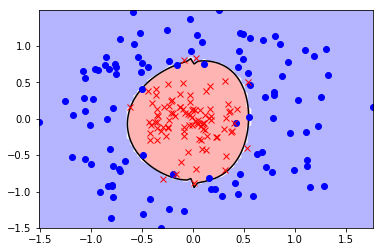

In [19]:
model = Model(3)
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

### Regularização L2

In [20]:
def fobj(self, w, X, y):
    ''' Compute cost and gradient for optimization '''
    L = np.identity(X.shape[1])
    L[0,0] = 0
    m = y.shape[0]
    y_hat = sigmoid(X @ w)
    # Cost function
    J = (-1/m)*(y.T @ np.log(y_hat) + (1-y).T @ np.log(1 - y_hat)) + self.lamb*(1/(2*m))*(w.T @ (L @ w))   
    # Grad function
    grad = (1/m)*(X.T @ (sigmoid(X @ w) - y)) + self.lamb*(1/m)*(L @ w)
    return J, grad

Model.fobj = fobj

In [21]:
# for lamb in np.array():
#     plot_boundary()
#     plt.show()

w:  [ 4.08140371 -0.77598042 -0.59935755 -9.59962042  0.666906   -6.25989046
 -0.01434422  0.27930846  0.19980996  0.87402716 -0.0351143 ]
Accuracy:  92.16666666666666 %
Train accuracy:  94.5 %
Test accuracy:  91.7 %


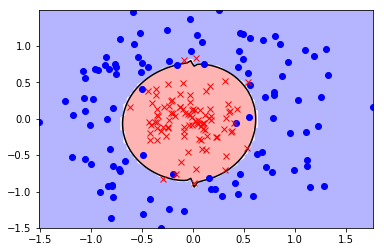

In [22]:
model = Model(3,0.1)
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

## Conjunto de dados #3

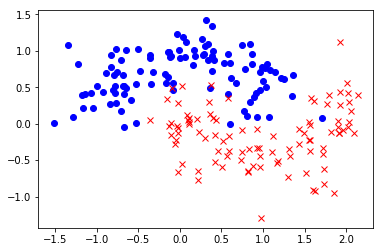

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1200, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=0)
plot_data(X_train,y_train)

w:  [ 0.97953555  1.44242042 -6.27161075]
Accuracy:  87.16666666666667 %
Train accuracy:  91.0 %
Test accuracy:  86.4 %


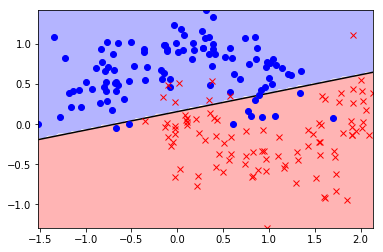

In [24]:
model = Model()
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

w:  [ 6.93444327e+00  1.10705131e+00 -1.29657466e+01 -1.87379839e+01
 -6.44373285e-01 -3.23827981e-03  1.21954183e-02  1.01563848e+01
  2.70179430e+00  9.66172658e+00 -3.55896927e+00]
Accuracy:  94.58333333333333 %
Train accuracy:  96.5 %
Test accuracy:  94.19999999999999 %


c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


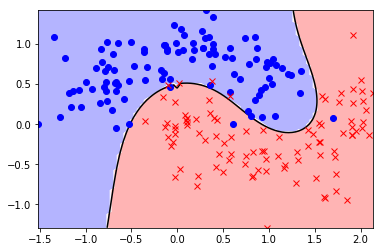

In [25]:
model = Model(3)
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

### Com regularização

c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


w:  [  4.23958281   1.00389049  -6.55104729 -13.17888268  -2.35671882
   0.0465349    0.01521559   7.43393741   0.41571218   7.78061751
  -6.47317964]
Accuracy:  95.08333333333333 %
Train accuracy:  97.0 %
Test accuracy:  94.69999999999999 %


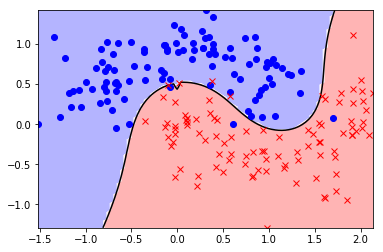

In [26]:
model = Model(3,0.01)
model.fit(X_train,y_train)
w = model.w
acc = model.accuracy(X,y)
acc_train = model.accuracy(X_train,y_train)
acc_test = model.accuracy(X_test, y_test)

print("w: ", w)
print("Accuracy: ", acc*100 ,"%")
print("Train accuracy: ", acc_train*100, "%")
print("Test accuracy: ", acc_test*100, "%")

plot_data(X_train,y_train)
plot_boundary(model.decision_function ,X_train)

## Conjunto de dados #4

In [27]:
df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [29]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


* Separando os dados em features e labels
* Shuffle nos dados
* Mudando label de string para 0 e 1

In [30]:
data = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].values

np.random.seed(0)
data = np.random.permutation(data)

X = data[:,[0,1,2,3]]
y = data[:,4]

y1 = (y == "Iris-setosa")
y2 = (y == "Iris-versicolor")
y3 = (y == "Iris-virginica")

X = X.astype(float)
y1 = y1.astype(int)
y2 = y2.astype(int)
y3 = y3.astype(int)

X.shape,y1.shape,y1

((150, 4),
 (150,),
 array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]))

Treinando 3 classificadores binários distintos

In [31]:
iris1 = Model()
iris1.fit(X,y1)
w1 = iris1.w
acc1 = iris1.accuracy(X,y1)

c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [32]:
print("w: ", w1)
print("Accuracy: ", acc1*100 ,"%")

w:  [  1.71350739   3.0709032    9.64735707 -14.3805576   -6.47402302]
Accuracy:  100.0 %


In [33]:
iris2 = Model()
iris2.fit(X,y2)
w2 = iris2.w
acc2 = iris2.accuracy(X,y2)

In [34]:
print("w: ", w2)
print("Accuracy: ", acc2*100 ,"%")

w:  [ 7.32295978 -0.25276163 -2.77940409  1.29938132 -2.70441286]
Accuracy:  74.0 %


In [35]:
iris3 = Model()
iris3.fit(X,y3)
w3 = iris3.w
acc3 = iris3.accuracy(X,y3)

In [36]:
print("w: ", w3)
print("Accuracy: ", acc3*100 ,"%")

w:  [-42.63723545  -2.46521652  -6.68063527   9.42934112  18.28551942]
Accuracy:  98.66666666666667 %


In [38]:
y1_pred = iris1.decision_function(X)
y2_pred = iris2.decision_function(X)
y3_pred = iris3.decision_function(X)

Matriz com os valores de predição de cada classificador

In [39]:
y_pred = np.c_[y1_pred,y2_pred,y3_pred]
y_pred[0]

array([[-4.23411533e+01, -1.78913530e+00,  1.63336163e+01],
       [-2.26331413e+01,  2.18481338e+00, -1.61230483e+01],
       [ 3.76947895e+01, -4.46247512e+00, -6.73964130e+01],
       [-5.01423181e+01,  7.35687137e-01,  1.23116257e+01],
       [ 2.70033964e+01, -1.98263290e+00, -5.98763624e+01],
       [-4.95719273e+01, -2.40621626e+00,  2.20756493e+01],
       [ 3.01968414e+01, -2.79089086e+00, -6.06017422e+01],
       [-2.51042895e+01, -9.36222951e-01, -8.11797309e+00],
       [-2.84820598e+01,  2.72701531e-01, -7.24592199e+00],
       [-1.84798436e+01, -3.19429093e-01, -1.48922953e+01],
       [-4.40656095e+01,  2.04502055e+00,  3.35932952e+00],
       [-2.21847132e+01, -1.39821113e+00, -9.93233989e+00],
       [-2.78988316e+01,  8.60579116e-01, -1.01203084e+01],
       [-2.71746215e+01, -1.81787528e-01, -6.56367332e+00],
       [-2.82289005e+01,  4.17561342e-02, -7.13126807e+00],
       [ 2.44495013e+01, -8.53094220e-01, -5.94542021e+01],
       [-2.63072816e+01, -4.63285252e-01

Vetor resultante one-hot. Predição pelo maior valor de discriminante

0 = Iris-setosa; 1 = Iris-versicolor; 2 = Iris-virginica

In [41]:
y[0]

'Iris-virginica'

In [40]:
np.argmax(y_pred[0])

2